In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def make_gaussian_kernel(sigma, truncate=3.0):
    radius = int(truncate * sigma + 0.5)
    size   = 2 * radius + 1
    ax     = np.arange(-radius, radius + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel /= kernel.sum()
    return kernel

# ─── File Paths ───────────────────────────────────────────
csv_path       = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Data\Moticon_data_walking\s001_1norm1.xlsx"              # Update this
foot_img_path  = r"E:\USA_PD_2024\Analysis\HES\Left_sole.png"                   # Update this
output_dir     = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Moticon_comparison\S001"            # Update this
os.makedirs(output_dir, exist_ok=True)

# ─── Parameters ─────────────────────────────────────────────
sigma           = 50
truncate        = 3.0
sensor_cols     = [f"left pressure {i}[N/cm²]" for i in range(1,17)]
sensor_positions = [
    (519, 1062), (431, 1070), (523, 948), (425, 958),
    (525, 827),  (423, 842),  (585, 667), (393, 709),
    (623, 495),  (555, 503),  (497, 511), (447, 521),
    (367, 581),  (609, 322),  (527, 344), (431, 392)
]

# ─── Load & Prep Data ─────────────────────────────────────
df = pd.read_excel(excel_path)
# ensure numeric
df[sensor_cols] = df[sensor_cols].apply(pd.to_numeric, errors='coerce')
# rename timestamp
df['Timestamp'] = df['# time']

# ─── Filter for Heel‐Strike (HES) frames ────────────────────
# Pull frames where the left‐foot event label says "HES"
hes_df = df[
    df["Event- Label level 2- Left Foot"]
      .str.contains("HES", na=False)
].copy()

# ─── Load Base Image & Kernel ───────────────────────────────
foot_img = Image.open(foot_img_path).convert("RGBA")
W, H     = foot_img.size
kernel   = make_gaussian_kernel(sigma=sigma, truncate=truncate)
k_h, k_w = kernel.shape
k_r, k_c = k_h // 2, k_w // 2

# ─── Loop & Save Heatmaps ──────────────────────────────────
for idx, (_, row) in enumerate(hes_df.iterrows()):
    if idx >= 2:   # drop or raise this limit to generate more
        break

    vals = row[sensor_cols].fillna(0).values.astype(float)
    heat = np.zeros((H, W), dtype=float)

    # stamp each sensor
    for (x, y), v in zip(sensor_positions, vals):
        ys = slice(max(0, y - k_r), min(H, y + k_r + 1))
        xs = slice(max(0, x - k_c), min(W, x + k_c + 1))
        ks_y0 = k_r - (y - ys.start)
        ks_x0 = k_c - (x - xs.start)
        ks_ys = slice(ks_y0, ks_y0 + (ys.stop - ys.start))
        ks_xs = slice(ks_x0, ks_x0 + (xs.stop - xs.start))
        heat[ys, xs] += v * kernel[ks_ys, ks_xs]

    auto_vmax = heat.max() * 1.05

    plt.figure(figsize=(6, 10))
    plt.imshow(foot_img, alpha=0.6)
    plt.imshow(
        heat,
        cmap='plasma',
        alpha=0.75,
        extent=(0, W, H, 0),
        vmin=0, vmax=auto_vmax,
        interpolation='bilinear'
    )
    plt.axis('off')
    plt.title(f"Pressure Heatmap — {row['Timestamp']}")
    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label("Pressure")

    fname = f"heatmap_{str(row['Timestamp']).replace(':','-')}.png"
    plt.savefig(os.path.join(output_dir, fname), dpi=300, bbox_inches='tight')
    plt.close()

print("✅ Heatmaps saved to:", output_dir)


C:\Users\Thathsara\AppData\Local\Temp\ipykernel_5292\4261201611.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vals = row[sensor_cols].fillna(0).values.astype(float)
C:\Users\Thathsara\AppData\Local\Temp\ipykernel_5292\4261201611.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vals = row[sensor_cols].fillna(0).values.astype(float)


✅ Heatmaps saved to: E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Moticon_comparison\S001


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def make_gaussian_kernel(sigma, truncate=3.0):
    radius = int(truncate * sigma + 0.5)
    ax     = np.arange(-radius, radius + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / kernel.sum()

# ─── File Paths & Params ─────────────────────────────────────────────────
csv_path       = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Data\Moticon_data_walking\s001_1norm1.xlsx"              # Update this
foot_img_path  = r"E:\USA_PD_2024\Analysis\HES\Left_sole.png"                   # Update this
output_dir     = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Moticon_comparison\S001"            # Update this
os.makedirs(output_dir, exist_ok=True)

sigma          = 50
truncate       = 3.0
sensor_cols    = [f"left pressure {i}[N/cm²]" for i in range(1,17)]
event_col      = "Event- Label level 2- Left Foot"

sensor_positions = [
    (519,1062), (431,1070), (523,948),  (425,958),
    (525,827),  (423,842),  (585,667),  (393,709),
    (623,495),  (555,503),  (497,511),  (447,521),
    (367,581),  (609,322),  (527,344),  (431,392)
]

# ─── Load & Prep ───────────────────────────────────────────────────────────
df = pd.read_excel(excel_path)

# 1) force‐convert all pressure cols to float, then fill NaNs once:
df[sensor_cols] = (
    df[sensor_cols]
      .apply(pd.to_numeric, errors='coerce')
      .fillna(0)
)

# 2) rename timestamp
df['Timestamp'] = df['# time']

# 3) select heel‐strike frames
hes_df = df[df[event_col].str.contains("HES", na=False)].reset_index(drop=True)

# ─── Prepare image & kernel ─────────────────────────────────────────────────
foot_img = Image.open(foot_img_path).convert("RGBA")
W, H     = foot_img.size
kernel   = make_gaussian_kernel(sigma, truncate)
k_h, k_w = kernel.shape
k_r, k_c = k_h//2, k_w//2

# ─── Loop over every HES frame & save ────────────────────────────────────────
for idx, row in hes_df.iterrows():
    vals = row[sensor_cols].values            # already floats
    heat = np.zeros((H, W), dtype=float)

    for (x,y), v in zip(sensor_positions, vals):
        ys = slice(max(0, y-k_r), min(H, y+k_r+1))
        xs = slice(max(0, x-k_c), min(W, x+k_c+1))
        ks_y0 = k_r - (y - ys.start)
        ks_x0 = k_c - (x - xs.start)
        ks_ys = slice(ks_y0, ks_y0 + (ys.stop-ys.start))
        ks_xs = slice(ks_x0, ks_x0 + (xs.stop-xs.start))
        heat[ys, xs] += v * kernel[ks_ys, ks_xs]

    vmax = heat.max() * 1.05

    plt.figure(figsize=(6,10))
    plt.imshow(foot_img, alpha=0.6)
    plt.imshow(heat,
               cmap='plasma',
               alpha=0.75,
               extent=(0, W, H, 0),
               vmin=0, vmax=vmax,
               interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Pressure Heatmap — {row['Timestamp']}")

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label("Pressure [N/cm²]")

    fname = f"heatmap_{str(row['Timestamp']).replace(':','-')}.png"
    plt.savefig(os.path.join(output_dir, fname),
                dpi=300, bbox_inches='tight')
    plt.close()

print("✅ Generated", len(hes_df), "heatmaps in", output_dir)


✅ Generated 397 heatmaps in E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Moticon_comparison\S001


✔ Processed 1/1713 frames
✔ Processed 51/1713 frames
✔ Processed 101/1713 frames
✔ Processed 151/1713 frames
✔ Processed 201/1713 frames
✔ Processed 251/1713 frames
✔ Processed 301/1713 frames
✔ Processed 351/1713 frames
✔ Processed 401/1713 frames


KeyboardInterrupt: 

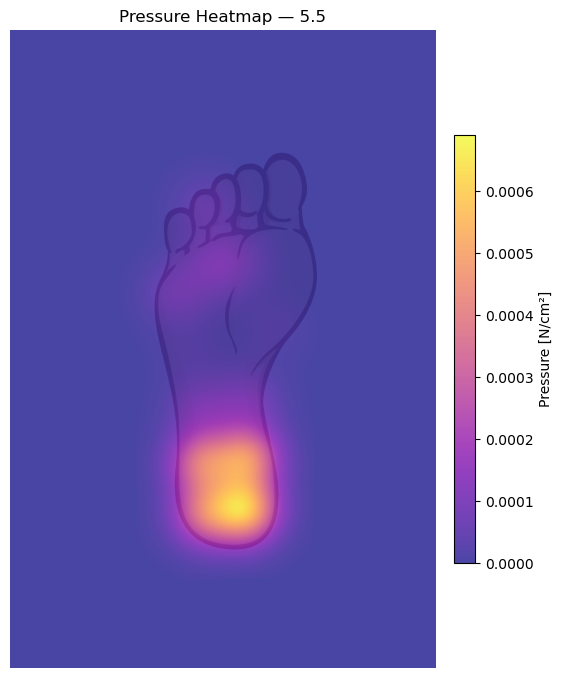

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# ─── Gaussian Kernel Function ─────────────────────────────
def make_gaussian_kernel(sigma, truncate=3.0):
    radius = int(truncate * sigma + 0.5)
    ax = np.arange(-radius, radius + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / kernel.sum()

# ─── File Paths ───────────────────────────────────────────
excel_path = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Data\Moticon_data_walking\s001_1norm1.xlsx"
foot_img_path = r"E:\USA_PD_2024\Analysis\HES\Left_sole.png"
output_dir = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Moticon_comparison\New folder"
os.makedirs(output_dir, exist_ok=True)

# ─── Parameters ───────────────────────────────────────────
sigma = 50
truncate = 3.0
sensor_cols = [f"left pressure {i}[N/cm²]" for i in range(1, 17)]
sensor_positions = [
    (519, 1062), (431, 1070), (523, 948), (425, 958),
    (525, 827), (423, 842), (585, 667), (393, 709),
    (623, 495), (555, 503), (497, 511), (447, 521),
    (367, 581), (609, 322), (527, 344), (431, 392)
]

# ─── Load & Prepare Data ──────────────────────────────────
df = pd.read_excel(excel_path)
df[sensor_cols] = df[sensor_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df['Timestamp'] = df['# time']  # rename time column for convenience
all_df = df.reset_index(drop=True)

# ─── Load Foot Image & Kernel ─────────────────────────────
foot_img = Image.open(foot_img_path).convert("RGBA")
W, H = foot_img.size
kernel = make_gaussian_kernel(sigma, truncate)
k_h, k_w = kernel.shape
k_r, k_c = k_h // 2, k_w // 2

# ─── Loop Over Every Timestamp ────────────────────────────
for idx, row in all_df.iterrows():
    vals = row[sensor_cols].values.astype(float)
    heat = np.zeros((H, W), dtype=float)

    for (x, y), v in zip(sensor_positions, vals):
        ys = slice(max(0, y - k_r), min(H, y + k_r + 1))
        xs = slice(max(0, x - k_c), min(W, x + k_c + 1))
        ks_y0 = k_r - (y - ys.start)
        ks_x0 = k_c - (x - xs.start)
        ks_ys = slice(ks_y0, ks_y0 + (ys.stop - ys.start))
        ks_xs = slice(ks_x0, ks_x0 + (xs.stop - xs.start))
        heat[ys, xs] += v * kernel[ks_ys, ks_xs]

    vmax = heat.max() * 1.05

    plt.figure(figsize=(6, 10))
    plt.imshow(foot_img, alpha=0.6)
    plt.imshow(
        heat,
        cmap='plasma',
        alpha=0.75,
        extent=(0, W, H, 0),
        vmin=0,
        vmax=vmax,
        interpolation='bilinear'
    )
    plt.axis('off')
    plt.title(f"Pressure Heatmap — {row['Timestamp']}")

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label("Pressure [N/cm²]")

    fname = f"heatmap_{str(row['Timestamp']).replace(':', '-').replace('.', '-')}.png"
    plt.savefig(os.path.join(output_dir, fname), dpi=300, bbox_inches='tight')
    plt.close()

    if idx % 50 == 0:
        print(f"✔ Processed {idx+1}/{len(all_df)} frames")

print("✅ All heatmaps saved to:", output_dir)


★ Global vmax = 0.002


KeyboardInterrupt: 

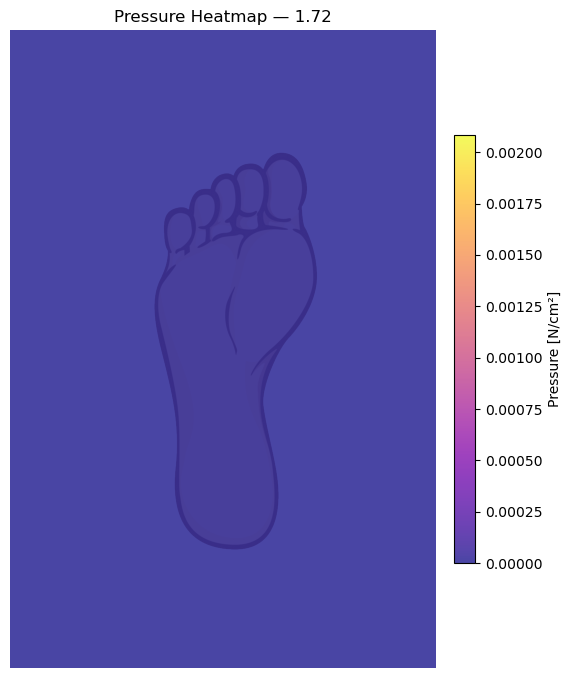

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, sys

# ─── Gaussian kernel ──────────────────────────────────────
def make_gaussian_kernel(sigma, truncate=3.0):
    r  = int(truncate * sigma + 0.5)
    ax = np.arange(-r, r + 1)
    xx, yy = np.meshgrid(ax, ax)
    k  = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return k / k.sum()

# ─── Paths ────────────────────────────────────────────────
excel_path = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Data\Moticon_data_walking\s001_1norm1.xlsx"
foot_img_path = r"E:\USA_PD_2024\Analysis\HES\Left_sole.png"
output_dir = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Moticon_comparison\New folder (2)"
os.makedirs(output_dir, exist_ok=True)

# ─── Parameters ───────────────────────────────────────────
sigma   = 50
sensor_cols = [f"left pressure {i}[N/cm²]" for i in range(1, 17)]
coords  = [
    (519,1062),(431,1070),(523,948),(425,958),
    (525,827),(423,842),(585,667),(393,709),
    (623,495),(555,503),(497,511),(447,521),
    (367,581),(609,322),(527,344),(431,392)
]

# ─── Data & common assets ─────────────────────────────────
df = pd.read_excel(excel_path)
df[sensor_cols] = df[sensor_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df['Timestamp'] = df['# time']           # convenience
img   = Image.open(foot_img_path).convert("RGBA")
W, H  = img.size
kern  = make_gaussian_kernel(sigma)
k_h, k_w = kern.shape
k_r, k_c = k_h//2, k_w//2

# ─── Pass 1: find global colour ceiling ───────────────────
global_vmax = 0.0
for _, row in df.iterrows():
    heat = np.zeros((H, W), dtype=float)
    for (x,y), v in zip(coords, row[sensor_cols]):
        ys = slice(max(0, y-k_r), min(H, y+k_r+1))
        xs = slice(max(0, x-k_c), min(W, x+k_c+1))
        k0y = k_r - (y - ys.start)
        k0x = k_c - (x - xs.start)
        ks_y = slice(k0y, k0y + (ys.stop-ys.start))
        ks_x = slice(k0x, k0x + (xs.stop-xs.start))
        heat[ys, xs] += v * kern[ks_y, ks_x]
    m = heat.max()
    if m > global_vmax:
        global_vmax = m

print(f"★ Global vmax = {global_vmax:.3f}")

# ─── Pass 2: save every frame with SAME scale ─────────────
for idx, row in df.iterrows():
    heat = np.zeros((H, W), dtype=float)
    for (x,y), v in zip(coords, row[sensor_cols]):
        ys = slice(max(0, y-k_r), min(H, y+k_r+1))
        xs = slice(max(0, x-k_c), min(W, x+k_c+1))
        k0y = k_r - (y - ys.start)
        k0x = k_c - (x - xs.start)
        ks_y = slice(k0y, k0y + (ys.stop-ys.start))
        ks_x = slice(k0x, k0x + (xs.stop-xs.start))
        heat[ys, xs] += v * kern[ks_y, ks_x]

    plt.figure(figsize=(6,10))
    plt.imshow(img, alpha=0.6)
    plt.imshow(heat,
               cmap='plasma',
               alpha=0.75,
               extent=(0,W,H,0),
               vmin=0, vmax=global_vmax,
               interpolation='bilinear')
    plt.axis('off')
    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label("Pressure [N/cm²]")
    plt.title(f"Pressure Heatmap — {row['Timestamp']}")

    fname = f"heatmap_{str(row['Timestamp']).replace(':','-').replace('.','-')}.png"
    plt.savefig(os.path.join(output_dir, fname),
                dpi=300, bbox_inches='tight')
    plt.close()

    if (idx+1) % 100 == 0:
        print(f"  saved {idx+1}/{len(df)}")

print("✅ All images written to", output_dir)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# ─── Gaussian Kernel Function ─────────────────────────────
def make_gaussian_kernel(sigma, truncate=3.0):
    r = int(truncate * sigma + 0.5)
    ax = np.arange(-r, r + 1)
    xx, yy = np.meshgrid(ax, ax)
    k = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return k / k.sum()

# ─── File Paths ───────────────────────────────────────────
excel_path     = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Data\Moticon_data_walking\s001_1norm1.xlsx"
foot_img_path  = r"E:\USA_PD_2024\Analysis\HES\Left_sole.png"
output_dir     = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Moticon_comparison\New folder (2)"
os.makedirs(output_dir, exist_ok=True)

# ─── Parameters ───────────────────────────────────────────
sigma = 50
truncate = 3.0
fixed_vmax = 0.00055  # <- fixed color scale across all images

sensor_cols = [f"left pressure {i}[N/cm²]" for i in range(1, 17)]
sensor_positions = [
    (519,1062), (431,1070), (523,948),  (425,958),
    (525,827),  (423,842),  (585,667),  (393,709),
    (623,495),  (555,503),  (497,511),  (447,521),
    (367,581),  (609,322),  (527,344),  (431,392)
]

# ─── Load Data ────────────────────────────────────────────
df = pd.read_excel(excel_path)
df[sensor_cols] = df[sensor_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df['Timestamp'] = df['# time']  # standardize timestamp

# ─── Load Base Image & Kernel ─────────────────────────────
foot_img = Image.open(foot_img_path).convert("RGBA")
W, H = foot_img.size
kernel = make_gaussian_kernel(sigma, truncate)
k_h, k_w = kernel.shape
k_r, k_c = k_h // 2, k_w // 2

# ─── Loop Over Timestamps ────────────────────────────────
for idx, row in df.iterrows():
    values = row[sensor_cols].values.astype(float)
    heat = np.zeros((H, W), dtype=float)

    for (x, y), v in zip(sensor_positions, values):
        ys = slice(max(0, y - k_r), min(H, y + k_r + 1))
        xs = slice(max(0, x - k_c), min(W, x + k_c + 1))
        ks_y0 = k_r - (y - ys.start)
        ks_x0 = k_c - (x - xs.start)
        ks_ys = slice(ks_y0, ks_y0 + (ys.stop - ys.start))
        ks_xs = slice(ks_x0, ks_x0 + (xs.stop - xs.start))
        heat[ys, xs] += v * kernel[ks_ys, ks_xs]

    # ─ Plot ─
    plt.figure(figsize=(6, 10))
    plt.imshow(foot_img, alpha=0.6)
    plt.imshow(
        heat,
        cmap='plasma',
        alpha=0.75,
        extent=(0, W, H, 0),
        vmin=0.0,
        vmax=fixed_vmax,
        interpolation='bilinear'
    )
    plt.axis('off')
    plt.title(f"Pressure Heatmap — {row['Timestamp']}")
    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label("Pressure [N/cm²]")

    # ─ Save ─
    fname = f"heatmap_{str(row['Timestamp']).replace(':','-').replace('.','-')}.png"
    plt.savefig(os.path.join(output_dir, fname), dpi=300, bbox_inches='tight')
    plt.close()

    if (idx + 1) % 100 == 0:
        print(f"✔ Saved {idx+1}/{len(df)}")

print("✅ All heatmaps saved with fixed pressure scale to:", output_dir)


✔ Saved 100/1713
✔ Saved 200/1713
✔ Saved 300/1713
✔ Saved 400/1713
✔ Saved 500/1713
✔ Saved 600/1713
✔ Saved 700/1713
✔ Saved 800/1713
✔ Saved 900/1713
✔ Saved 1000/1713
✔ Saved 1100/1713
✔ Saved 1200/1713
✔ Saved 1300/1713
✔ Saved 1400/1713
✔ Saved 1500/1713
✔ Saved 1600/1713


MemoryError: Unable to allocate 18.6 MiB for an array with shape (1914, 1276) and data type float64

MemoryError: Unable to allocate 2.07 MiB for an array with shape (638, 426) and data type float64

<Figure size 600x1000 with 2 Axes>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# ─── Gaussian Kernel Function ─────────────────────────────
def make_gaussian_kernel(sigma, truncate=3.0):
    r = int(truncate * sigma + 0.5)
    ax = np.arange(-r, r + 1)
    xx, yy = np.meshgrid(ax, ax)
    k = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return k / k.sum()

# ─── File Paths ───────────────────────────────────────────
excel_path     = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Data\Moticon_data_walking\s001_1norm1.xlsx"
foot_img_path  = r"E:\USA_PD_2024\Analysis\HES\Right_sole.png"
output_dir     = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Moticon_comparison\S001_R"
os.makedirs(output_dir, exist_ok=True)

# ─── Parameters ───────────────────────────────────────────
sigma = 50
truncate = 3.0
fixed_vmax = 0.00055  # <- fixed color scale across all images

sensor_cols = [f"right pressure {i}[N/cm²]" for i in range(1, 17)]
sensor_positions = [
    (422, 1074), (510, 1082), (416, 953),  (518, 970),
    (413, 831),  (520, 852),  (347, 647),  (549, 713),
    (313, 498),  (384, 501),  (442, 513),  (496, 523),
    (572, 570),  (333, 333),  (410, 355),  (501, 394)
]

# ─── Load Data ────────────────────────────────────────────
df = pd.read_excel(excel_path)
df[sensor_cols] = df[sensor_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df['Timestamp'] = df['# time']  # standardize timestamp

# ─── Load Base Image & Kernel ─────────────────────────────
foot_img = Image.open(foot_img_path).convert("RGBA")
W, H = foot_img.size
kernel = make_gaussian_kernel(sigma, truncate)
k_h, k_w = kernel.shape
k_r, k_c = k_h // 2, k_w // 2

# ─── Loop Over Timestamps ────────────────────────────────
for idx, row in df.iterrows():
    values = row[sensor_cols].values.astype(float)
    heat = np.zeros((H, W), dtype=float)

    for (x, y), v in zip(sensor_positions, values):
        ys = slice(max(0, y - k_r), min(H, y + k_r + 1))
        xs = slice(max(0, x - k_c), min(W, x + k_c + 1))
        ks_y0 = k_r - (y - ys.start)
        ks_x0 = k_c - (x - xs.start)
        ks_ys = slice(ks_y0, ks_y0 + (ys.stop - ys.start))
        ks_xs = slice(ks_x0, ks_x0 + (xs.stop - xs.start))
        heat[ys, xs] += v * kernel[ks_ys, ks_xs]

    # ─ Plot ─
    plt.figure(figsize=(6, 10))
    plt.imshow(foot_img, alpha=0.6)
    plt.imshow(
        heat,
        cmap='plasma',
        alpha=0.75,
        extent=(0, W, H, 0),
        vmin=0.0,
        vmax=fixed_vmax,
        interpolation='bilinear'
    )
    plt.axis('off')
    plt.title(f"Pressure Heatmap — {row['Timestamp']}")
    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label("Pressure [N/cm²]")

    # ─ Save ─
    fname = f"heatmap_{str(row['Timestamp']).replace(':','-').replace('.','-')}.png"
    plt.savefig(os.path.join(output_dir, fname), dpi=300, bbox_inches='tight')
    plt.close()

    if (idx + 1) % 100 == 0:
        print(f"✔ Saved {idx+1}/{len(df)}")

print("✅ All heatmaps saved with fixed pressure scale to:", output_dir)


✔ Saved 100/1713
✔ Saved 200/1713
✔ Saved 300/1713
✔ Saved 400/1713
✔ Saved 500/1713
✔ Saved 600/1713
✔ Saved 700/1713
✔ Saved 800/1713
✔ Saved 900/1713
✔ Saved 1000/1713
✔ Saved 1100/1713
✔ Saved 1200/1713
✔ Saved 1300/1713
✔ Saved 1400/1713
✔ Saved 1500/1713
✔ Saved 1600/1713
✔ Saved 1700/1713
✅ All heatmaps saved with fixed pressure scale to: E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Moticon_comparison\S001_R
